In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline 
import iut

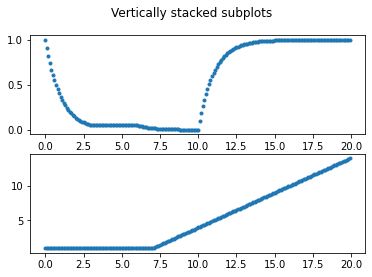

In [3]:
## Circuit T_1

R=1.0
C=1.0

# initial condition
y0_0 = 1.0
y1_0 = 1.0

y0 = [y0_0, y1_0]

def u(t):
    if t < 5:
        return 0.0
    else:
        return 1.0

def circuit_A(y, t):
    dydt_1 = 0
    dydt_2 = iut.f_u(t)
    return [dydt_1, dydt_2]

def circuit_B(y, t):
    dydt_1 = -1/(R*C)*y[0]
    dydt_2 = iut.f_u(t)
    return [dydt_1, dydt_2]

def circuit_C(y, t):
    dydt_1 = -1/(R*C)*y[0] + 1/(R*C)*u(t)
    dydt_2 = iut.f_u(t)
    return [dydt_1, dydt_2]

# function that returns dy/dt
def model(y,t):
    mode = iut.mode(t)
    if mode == 0:
        return circuit_C(y, t)
    elif mode == 1:
        return circuit_A(y, t)
    else:
        return circuit_B(y, t)


# time points
t = np.arange(0, 20, 0.1)

# solve ODE
y = odeint(model,y0,t)

# plot results

fig, axs = plt.subplots(2)
fig.suptitle('Vertically stacked subplots')

axs[0].plot(t,y[:,0], '.')
axs[1].plot(t,y[:,1], '.')


plt.show()